# BX Books dataset  - Data Cleaning
  
Source: The dataset is available [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.sparse import csr_matrix, coo_matrix
import numpy as np

%matplotlib inline
plt.rcParams['figure.dpi'] = 600

### User Dataset

In [3]:
users = pd.read_csv('../raw-data/BX-Users.csv', sep = ';', encoding = 'iso-8859-1')

In [4]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [5]:
len(users["User-ID"].unique())

278858

### Ratings dataset

In [6]:
ratings = pd.read_csv('../raw-data/BX-Book-Ratings.csv', encoding='iso-8859-1', sep = ';')
ratings.columns = ['user_id', 'isbn', 'book_rating']

In [7]:
ratings.dtypes

user_id         int64
isbn           object
book_rating     int64
dtype: object

In [8]:
ratings.head(10)

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [9]:
ratings.shape

(1149780, 3)

---  
### Books Dataset

In [10]:
books = pd.read_csv('../raw-data/BX-Books.csv', sep=';', encoding = 'iso-8859-1', dtype =str)

In [11]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [12]:
books['isbn'] = books['ISBN']

In [13]:
del books['Image-URL-L']
del books['Image-URL-M']
del books['Image-URL-S']
del books['Book-Author']
del books['Year-Of-Publication']
del books['Publisher']
del books['ISBN']

In [14]:
books.head()

,Book-Title,isbn
0,Classical Mythology,0195153448
1,Clara Callan,0002005018
2,Decision in Normandy,0060973129
3,Flu: The Story of the Great Influenza Pandemic...,0374157065
4,The Mummies of Urumchi,0393045218


In [15]:
print(len(books['isbn'].unique()))

271379


In [16]:
overall = books.merge(ratings, on ='isbn')

In [17]:
overall.shape

(1031175, 4)

In [18]:
len(overall.isbn.unique())

270170

In [19]:
overall.head()

,Book-Title,isbn,user_id,book_rating
0,Classical Mythology,0195153448,2,0
1,Clara Callan,0002005018,8,5
2,Clara Callan,0002005018,11400,0
3,Clara Callan,0002005018,11676,8
4,Clara Callan,0002005018,41385,0


In [20]:
newdf = overall[overall.book_rating>0]
print(newdf.shape)

(383852, 4)


In [21]:
print(len(newdf.user_id.unique()))
print(len(newdf.isbn.unique()))

68092
149842


In [35]:

width = 100
height = 12
plt.figure(figsize=(width, height))

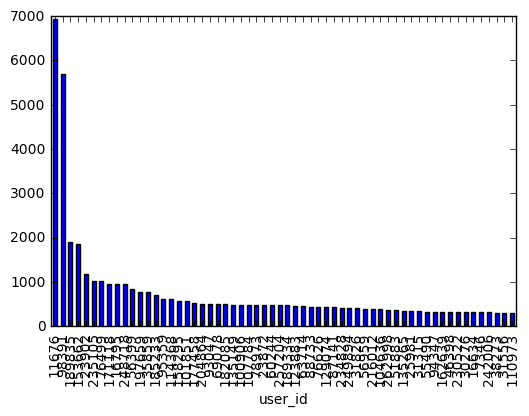

In [40]:
newdf.groupby('user_id').count()['isbn'].sort_values(ascending=False).head(60).plot(kind='bar');

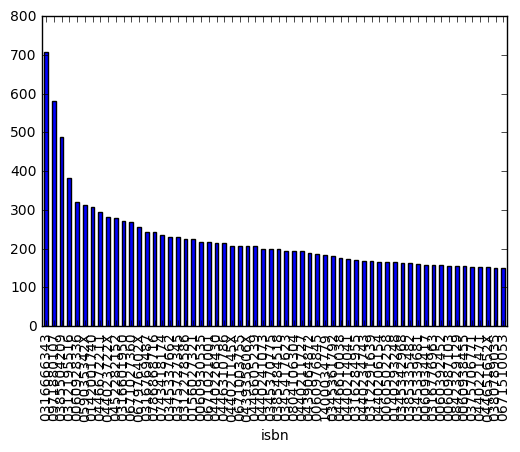

In [39]:
newdf.groupby('isbn').count()['user_id'].sort_values(ascending=False).head(60).plot(kind='bar');

In [43]:
newdf.groupby('user_id').count().sort_values('isbn', ascending = False).mean()

Book-Title     5.637255
isbn           5.637255
book_rating    5.637255
dtype: float64

In [44]:
newdf.groupby('isbn').count().sort_values('user_id', ascending = False).mean()

Book-Title     2.561712
user_id        2.561712
book_rating    2.561712
dtype: float64